In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base ()
# reflect the tables
Base.prepare(engine,reflect=True)


In [20]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).first()

<AxesSubplot: xlabel='Date'>

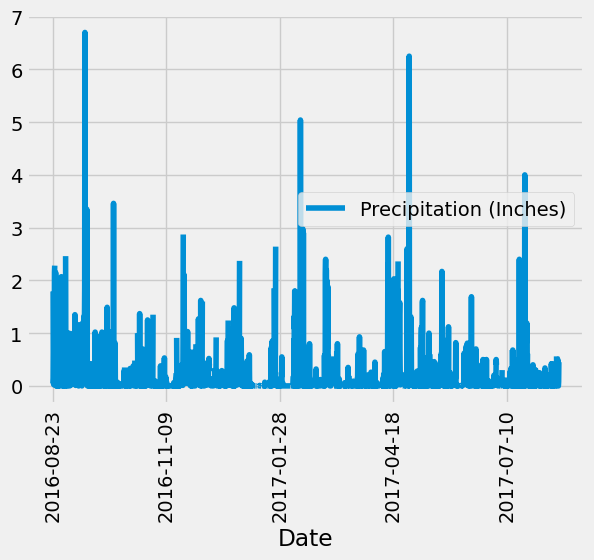

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
oneyr_date = dt.date(2017,8,23)-dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
precip_score = session.query(measurement.date,measurement.prcp).filter(measurement.date >=oneyr_date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(precip_score,columns=["Date","Precipitation (Inches)"])


# Sort the dataframe by date
df=df.sort_values("Date")
df

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="Date",y="Precipitation (Inches)",rot=90)




In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [42]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=="USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot: ylabel='Frequency'>

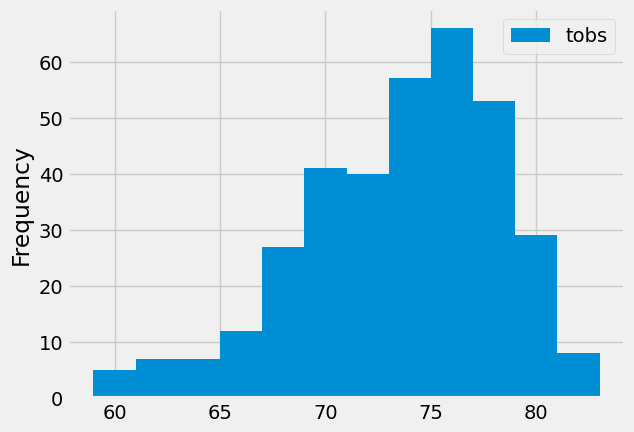

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stationdata= session.query(measurement.tobs).filter(measurement.station=="USC00519281").filter(measurement.date >=oneyr_date).all()
df=pd.DataFrame (stationdata,columns=["tobs"])
plt.xlabel="Tempature"
df.plot.hist(bins=12)

# Close session

In [50]:
# Close Session
session.close()

In [53]:
import sqlalchemy
import datetime as dt
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask

In [54]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base ()
# reflect the tables
Base.prepare(engine,reflect=True)
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station



In [59]:
app = Flask(__name__)
precep_dict = {"Date": "Precipitation (Inches)"}
@app.route("/")
def welcome():
     "List all avaliable routes"
     return(
         f"/api/v1.0/precipitation"
         f"/api/v1.0/stations"
         f"/api/v1.0/tobs"
         f"/api/v1.0/<start>"
         f"api/v1.0/<start>/<end>"
     )

@app.route("/api/v1.0/precipitation")
def precepitation():
    "Converting the query results to a dict"
    oneyr_date = dt.date(2017,8,23)-dt.timedelta(days=365)


    precip_score = session.query(measurement.date,measurement.prcp).filter(measurement.date >=oneyr_date).all()
    precep_dict = {date:prcp for date,prcp in precip_score}
    return jsonify(precep_dict)

@app.route("/api/v1.0/stations")
def station():
    session=Session(engine)
    "pu††ing station into list"
    station_list = session.query(func.count(station.station)).all()

@app.route("/api/v1.0/tobs")
def tobs():
    session=Session(engine)
    "query for date and temp observations"
    
prev_year  = dt.date(2017,8,23)-dt.timedelta(days=365)
session.query(measurement.station, func.count(measurement.station))





@app.route("/api/v1.0/<start>")
def start():
        session=Session(engine)




@app.route("/api/v1.0/<start>/<end>")
def end():
        session=Session(engine)






if __name__ == "__main__":
        app.run(debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
/Users/Nas/opt/anaconda3/envs/PythonData/lib/python3.10/site-packages/traitlets/traitlets.py:2202: FutureWarning: Supporting extra quotes around strings is deprecated in traitlets 5.0. You can use 'hmac-sha256' instead of '"hmac-sha256"' if you require traitlets >=5.
  warn(
/Users/Nas/opt/anaconda3/envs/PythonData/lib/python3.10/site-packages/traitlets/traitlets.py:2157: FutureWarning: Supporting extra quotes around Bytes is deprecated in traitlets 5.0. Use '370a1a10-a4e3-48f4-9d4e-c36bd0acb67f' instead of 'b"370a1a10-a4e3-48f4-9d4e-c36bd0acb67f"'.
  warn(
Traceback (most recent call last):
  File "/Users/Nas/opt/anaconda3/envs/PythonData/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/Nas/opt/anaconda3/envs/PythonData/lib/python3.10/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
 

SystemExit: 1

/Users/Nas/opt/anaconda3/envs/PythonData/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


datetime.date(2016, 8, 23)